# **Hamiltonian Model for Multivariate Porous Material Design**
This notebook demonstrates the step-by-step process of constructing and solving a Hamiltonian model for user-specified **multivariate material configurations** using quantum computing techniques.

---


## **1. Define Graph Representation $G(i, j, w)$**

- A **graph representation** of the material is defined where:
  - Nodes $(i$ or $j)$ represent linker sites.
  - Edges $(i, j)$ represents connectivity between linker sites 
    - Direct topological connections (i.e. linker sites that are connected to one another directly by an edge) 
    - Spatial adjacency (i.e. linker sites that are not directly bonded but positioned as the next-nearest neighbors)
  - Weight $(w)$ represents the interaction strength or geometric constraints between linkers.
- The below example defines a **kgm topology** with **six linker sites**.

Number of linker sites defined: 6


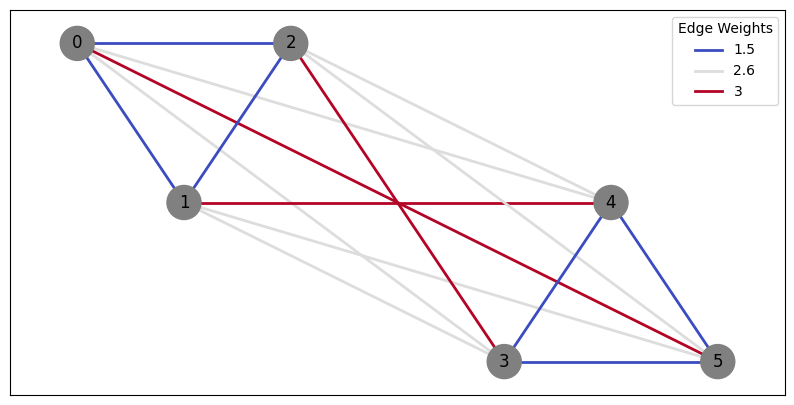

In [1]:
import numpy as np
import networkx as nx

from test_code import draw_graph

G = nx.Graph()

# kgm unit cell with six linker sites
elist = [(0, 1, 1.5), (0, 2, 1.5), (0, 3, 2.6), (0, 4, 2.6), (0, 5, 3),
         (1, 2, 1.5), (1, 3, 2.6), (1, 4, 3), (1, 5, 2.6), 
         (2, 3, 3), (2, 4, 2.6), (2, 5, 2.6), 
         (3, 4, 1.5), (3, 5, 1.5), 
         (4, 5, 1.5)
         ]

# Define node positions for visualization
pos = { 0: (-0.75, 3.897), 1: (0, 2.598), 2: (0.75, 3.897), 3: (2.25, 1.299), 
       4: (3, 2.598), 5: (3.75, 1.299)}

G.add_weighted_edges_from(elist)

n = len(pos)

print(f"Number of linker sites defined: {n}")

draw_graph(G, pos=pos, figsize=(10, 5))

## **2. Define Linker Candidates and Construct the Cost Function**
 - Define possible linker types (e.g. A, B, C, D) and their characteristic lengths.
 - Characteristic lengths represent the length of each linker within the framework in unit of Angstroms.
 - `MTVcost` class defines a quadratic cost function for optimizaing linker assignments 

In [2]:
from test_code import MTVcost

# Define linker types
linkers = ['A', 'B']
required_counts = {'A': 3, 'B': 3}

# e.g. characteristic lengths of linkers (in Angstroms)
# Esample: BPDA (A) and TPDA (B) linkers for SIOC-COF2 
lengths = {'A': 4.6, 'B': 6.89}

cost = MTVcost(G, required_counts=required_counts, linkers=linkers, lengths=lengths)

qubo_prob = cost.to_quadratic_program()

print(qubo_prob.prettyprint())

Problem name: MTV Porous Material Cost Function

Minimize
  1131.9786666666664*q_0_A^2 + 2493.188266666666*q_0_A*q_0_B
  + 21.94133333333326*q_0_A*q_1_A - 566.2661333333335*q_0_A*q_1_B
  + 21.94133333333326*q_0_A*q_2_A - 566.2661333333335*q_0_A*q_2_B
  + 208.14933333333337*q_0_A*q_3_A - 287.3589333333333*q_0_A*q_3_B
  + 208.1493333333334*q_0_A*q_4_A - 287.3589333333333*q_0_A*q_4_B
  + 275.86133333333333*q_0_A*q_5_A - 185.9381333333333*q_0_A*q_5_B
  + 1917.8333866666667*q_0_B^2 - 566.2661333333334*q_0_B*q_1_A
  - 448.16818666666677*q_0_B*q_1_B - 566.2661333333335*q_0_B*q_2_A
  - 448.16818666666677*q_0_B*q_2_B - 287.3589333333333*q_0_B*q_3_A
  - 30.4137066666666*q_0_B*q_3_B - 287.35893333333337*q_0_B*q_4_A
  - 30.4137066666666*q_0_B*q_4_B - 185.93813333333338*q_0_B*q_5_A
  + 121.49701333333337*q_0_B*q_5_B + 1131.9786666666666*q_1_A^2
  + 2493.188266666666*q_1_A*q_1_B + 21.94133333333326*q_1_A*q_2_A
  - 566.2661333333335*q_1_A*q_2_B + 208.14933333333337*q_1_A*q_3_A
  - 287.3589333333333*q

### **Convert to Ising Hamiltonian**
Conver the QUBO form into an Ising Hamiltonian, suitable for quantum optimization.

In [3]:
qubitOp, offset = qubo_prob.to_ising()
print("Offset:", offset)
print("Ising Hamiltonian:")
print(str(qubitOp))

Offset: 4574.718080000001
Ising Hamiltonian:
SparsePauliOp(['IIIIIIIIIIIZ', 'IIIIIIIIIZII', 'IIIIIIIZIIII', 'IIIIIZIIIIII', 'IIIZIIIIIIII', 'IZIIIIIIIIII', 'IIIIIIIIIIZI', 'IIIIIIIIZIII', 'IIIIIIZIIIII', 'IIIIZIIIIIII', 'IIZIIIIIIIII', 'ZIIIIIIIIIII', 'IIIIIIIIIIZZ', 'IIIIIIIIIZIZ', 'IIIIIIIIZIIZ', 'IIIIIIIZIIIZ', 'IIIIIIZIIIIZ', 'IIIIIZIIIIIZ', 'IIIIZIIIIIIZ', 'IIIZIIIIIIIZ', 'IIZIIIIIIIIZ', 'IZIIIIIIIIIZ', 'ZIIIIIIIIIIZ', 'IIIIIIIIIZZI', 'IIIIIIIIZIZI', 'IIIIIIIZIIZI', 'IIIIIIZIIIZI', 'IIIIIZIIIIZI', 'IIIIZIIIIIZI', 'IIIZIIIIIIZI', 'IIZIIIIIIIZI', 'IZIIIIIIIIZI', 'ZIIIIIIIIIZI', 'IIIIIIIIZZII', 'IIIIIIIZIZII', 'IIIIIIZIIZII', 'IIIIIZIIIZII', 'IIIIZIIIIZII', 'IIIZIIIIIZII', 'IIZIIIIIIZII', 'IZIIIIIIIZII', 'ZIIIIIIIIZII', 'IIIIIIIZZIII', 'IIIIIIZIZIII', 'IIIIIZIIZIII', 'IIIIZIIIZIII', 'IIIZIIIIZIII', 'IIZIIIIIZIII', 'IZIIIIIIZIII', 'ZIIIIIIIZIII', 'IIIIIIZZIIII', 'IIIIIZIZIIII', 'IIIIZIIZIIII', 'IIIZIIIZIIII', 'IIZIIIIZIIII', 'IZIIIIIZIIII', 'ZIIIIIIZIIII', 'IIIIIZZIIIII', 'IIIIZIZIIII

### **Compute the Minimum Eigenvalue Classically**
Prior to simulation, you can compute the lowest eigenvalue of the Hamiltonian matrix using classical diagonalization.

In [4]:
import numpy as np
from scipy.linalg import eigh

hamiltonian_matrix = qubitOp.to_matrix()
eigenvalues, _ = eigh(hamiltonian_matrix)

print("Minimum eigenvalue of the Hamiltonian:", min(eigenvalues))

Minimum eigenvalue of the Hamiltonian: -4385.930480000002


## **3. Define Quantum Circuit**
 - Define a parametric quantum circuit (ansatz) for variational quantum algorithms.

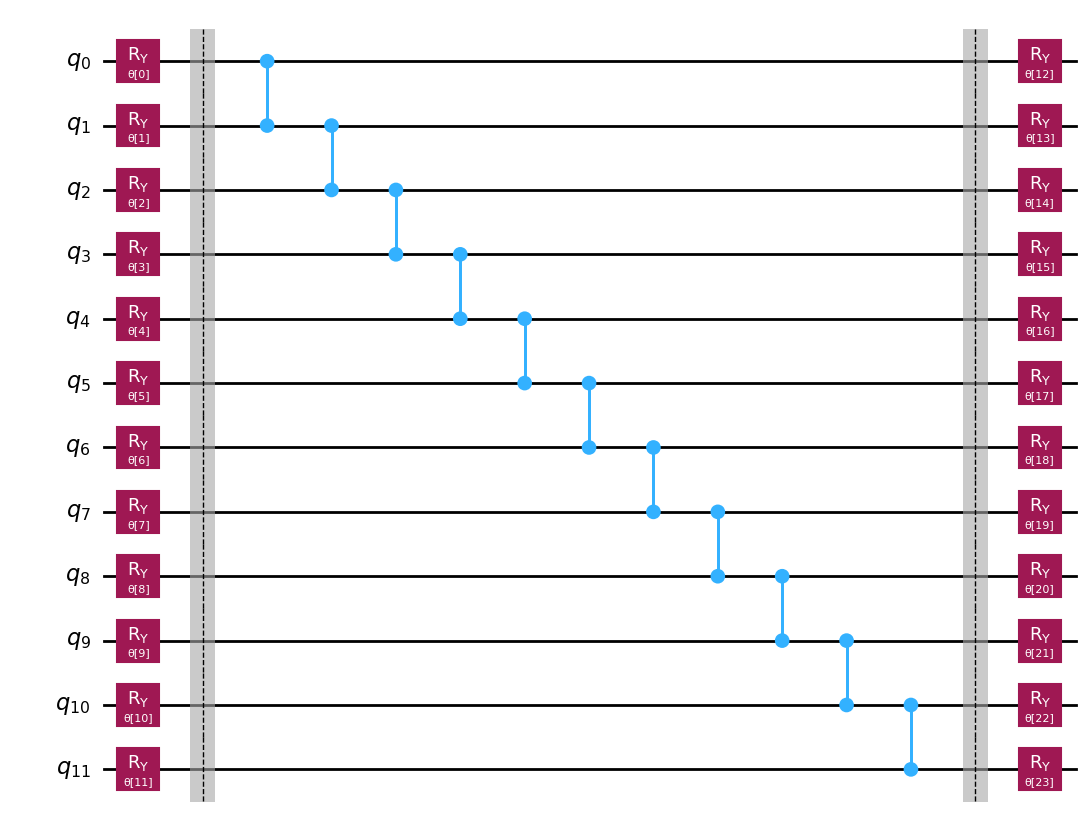

In [5]:
from qiskit_algorithms.utils import algorithm_globals
from qiskit.circuit.library import TwoLocal

num_qubits = qubitOp.num_qubits

ansatz = TwoLocal(num_qubits, "ry", "cz", reps = 1, entanglement="linear", insert_barriers = True)

ansatz.decompose().draw(output = "mpl", fold=-1)

## **4. Choose classical optimizer**

In [6]:
from qiskit_algorithms.optimizers import SPSA

algorithm_globals.random_seed = 27 # Controls SPSA's randomness

optimizer = SPSA(maxiter = 200, learning_rate=0.00009, perturbation=0.09)

## **5. Initiate sampler for VQE**
 - Use SamplimgVQE to estimate the ground state of the Hamiltonian.
 - Sampler is used for probabilistic measurement.

In [7]:
from qiskit_algorithms import SamplingVQE
from qiskit.primitives import Sampler

seed = 123 # controls sampler's behavior
num_shots = 1024

sampler = Sampler(options={"shots": num_shots, "seed": seed})

np.random.seed(10568)
initial_params = np.random.uniform(-np.pi, np.pi, ansatz.num_parameters)

vqe = SamplingVQE(sampler = sampler, ansatz = ansatz, optimizer = optimizer, initial_point=initial_params)

## **6. Run simulation**
 - Solve the Hamiltonian optimization problem using MinimumEigenOptimizer
 - Extract the best eigenvalue and optimal solution

In [8]:
from qiskit_optimization.algorithms import MinimumEigenOptimizer

vqe_optimizer = MinimumEigenOptimizer(vqe)
min_optimizer_result = vqe_optimizer.solve(qubo_prob)

print(f"Expectation value: {min_optimizer_result.min_eigen_solver_result.eigenvalue.real}\n")
print(f"Lowest Hamiltonian: {min_optimizer_result.fval}\n")
print(f"Best measurement probability: {min_optimizer_result.min_eigen_solver_result.best_measurement['probability']}\n")

print("Samples:\n")
for sample in min_optimizer_result.samples:
    bitstring = ''.join(map(str, sample.x.astype(int)))
    print(f"  x: {bitstring}, fval: {sample.fval}, probability: {sample.probability}\n")

Expectation value: -4374.930916145834

Lowest Hamiltonian: 188.78760000000057

Best measurement probability: 0.990234375

Samples:

  x: 010101101010, fval: 188.78760000000057, probability: 0.990234375

  x: 010101011010, fval: 619.5529866666657, probability: 0.001953125

  x: 010101100110, fval: 619.5529866666675, probability: 0.0009765625

  x: 010110001010, fval: 1542.5481866666669, probability: 0.0009765625

  x: 011101101010, fval: 1573.5822666666663, probability: 0.0029296875

  x: 010111101010, fval: 1573.5822666666663, probability: 0.0009765625

  x: 010101101011, fval: 1727.946586666667, probability: 0.0009765625

  x: 010101101110, fval: 1727.9465866666687, probability: 0.0009765625



### **Visualize the Probability Distribution**

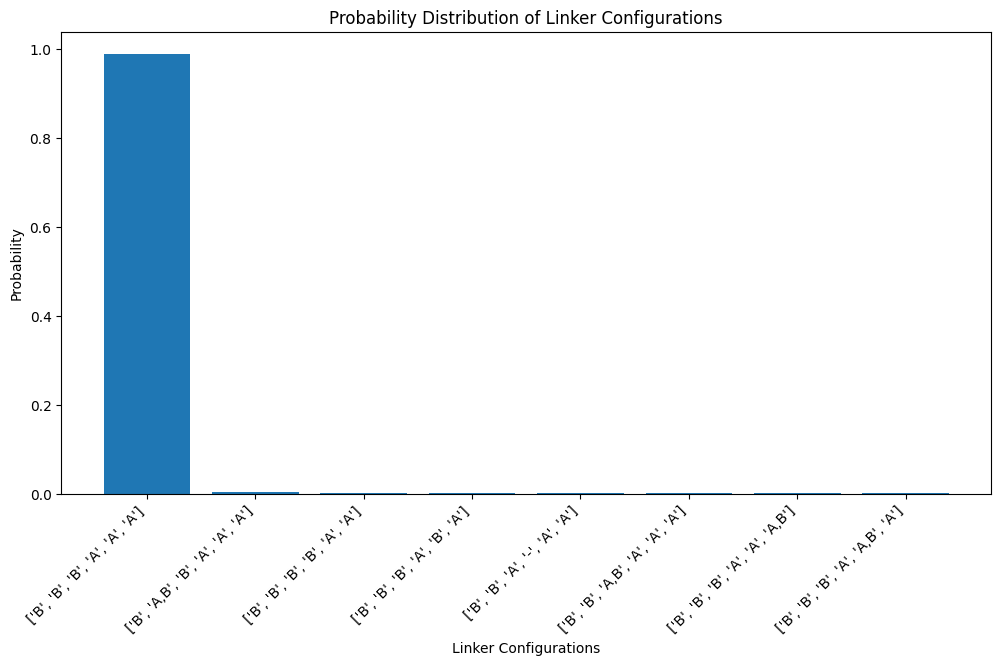

In [9]:
cost.plot_distribution(min_optimizer_result.samples)

### **You can also compute exact solution using classical solver**
 - NumPyMinimumEigensolver provides an exact reference solution for validation.

In [10]:
from qiskit_optimization.algorithms import MinimumEigenOptimizer
from qiskit_algorithms import NumPyMinimumEigensolver

exact = MinimumEigenOptimizer(NumPyMinimumEigensolver())
result = exact.solve(qubo_prob)

print(result.prettyprint())

objective function value: 188.78760000000057
variable values: q_0_A=0.0, q_0_B=1.0, q_1_A=0.0, q_1_B=1.0, q_2_A=0.0, q_2_B=1.0, q_3_A=1.0, q_3_B=0.0, q_4_A=1.0, q_4_B=0.0, q_5_A=1.0, q_5_B=0.0
status: SUCCESS


### **Interpret the Ground-State Linker Configuration**
 - convert the optimal vinary solution into a human-readable linker assignment.

Ground state linker configuration:  ['B', 'B', 'B', 'A', 'A', 'A']


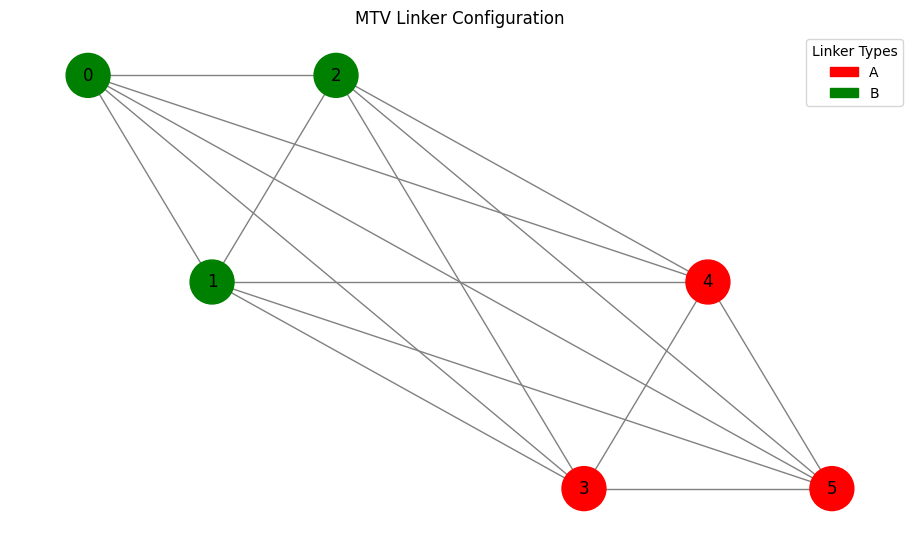

In [11]:
solution = cost.interpret(result)
print("Ground state linker configuration: ", solution)
cost._draw_result(result, pos)